In [757]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

In [758]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [759]:
df= pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/dataSLSHSLpqr.csv')

df.head(11)

,p,q,r,A1,L1,A2,L2,A3,L3
0,3,2,2,0.697272,588,0.897795,622,0.673578,655
1,3,3,2,0.737086,592,0.917456,621,0.701330,650
2,3,4,2,0.731879,595,0.917330,621,0.696167,647
3,3,5,2,0.608153,596,0.905459,621,0.632662,645
4,3,6,2,0.492272,597,0.892537,621,0.527849,644
5,3,7,2,0.412174,598,0.882359,621,0.404073,643
6,3,8,2,0.273795,598,0.875351,621,0.301801,643
7,3,9,2,0.199852,599,0.870844,621,0.206111,643
8,3,2,3,0.739739,592,0.829748,621,0.684369,651
9,3,3,3,0.781619,596,0.895376,621,0.726220,645


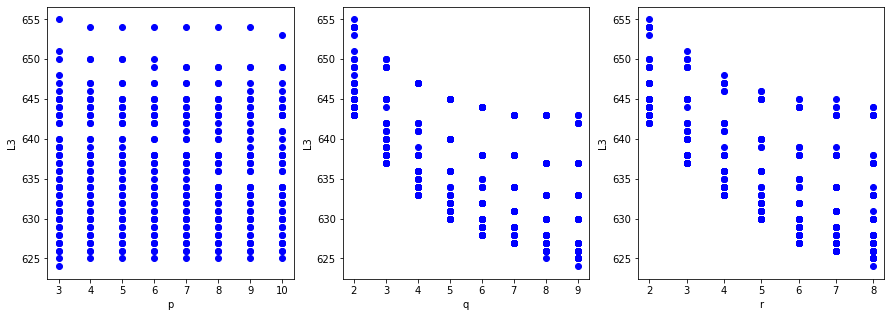

In [760]:
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.scatter(df.p, df.L3,  color='blue')
#plt.ylim(0,1)
#plt.xlim(0,11)
plt.xlabel("p")
plt.ylabel("L3")
plt.subplot(1,3,2)
plt.scatter(df.q, df.L3,  color='blue')
#plt.ylim(0,1)
#plt.xlim(0,11)
plt.xlabel("q")
plt.ylabel("L3")
plt.subplot(1,3,3)
plt.scatter(df.r, df.L3,  color='blue')
#plt.ylim(0,1)
#plt.xlim(0,11)
plt.xlabel("r")
plt.ylabel("L3")
plt.show()

In [761]:
cdf = df[['p','q','r','L3']]
cdf.head(9)

,p,q,r,L3
0,3,2,2,655
1,3,3,2,650
2,3,4,2,647
3,3,5,2,645
4,3,6,2,644
5,3,7,2,643
6,3,8,2,643
7,3,9,2,643
8,3,2,3,651


In [762]:
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]
len(df)

448

In [763]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
x = np.asanyarray(train[['p','q','r']])
y = np.asanyarray(train[['L3']])
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=3)
regr.fit (x_train, y_train)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('intercepts: ', regr.intercept_)

Coefficients:  [[ 0.00252662 -2.05372272 -2.39450845]]
intercepts:  [659.70171568]


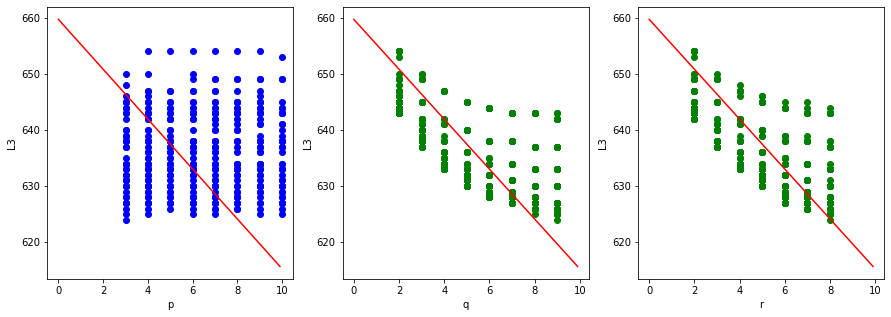

In [764]:
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.scatter(train.p, train.L3,  color='blue')
plt.xlabel("p")
plt.ylabel("L3")
XX = np.arange(0.0, 10.0, 0.1)
yy = regr.intercept_[0]+ regr.coef_[0][0]*XX + regr.coef_[0][1]*XX + regr.coef_[0][2]*XX
plt.plot(XX, yy, '-r' )
#plt.ylim(0,1)
#plt.xlim(0,11)

plt.subplot(1,3,2)
plt.scatter(train.q, train.L3,  color='green')
plt.xlabel("q")
plt.ylabel("L3")
XX = np.arange(0.0, 10.0, 0.1)
yy = regr.intercept_[0]+ regr.coef_[0][0]*XX + regr.coef_[0][1]*XX  + regr.coef_[0][2]*XX
#plt.ylim(0,1)
#plt.xlim(0,11)
plt.plot(XX, yy, '-r' )

plt.subplot(1,3,3)
plt.scatter(train.r, train.L3,  color='green')
plt.xlabel("r")
plt.ylabel("L3")
XX = np.arange(0.0, 10.0, 0.1)
yy = regr.intercept_[0]+ regr.coef_[0][0]*XX + regr.coef_[0][1]*XX  + regr.coef_[0][2]*XX
#plt.ylim(0,1)
#plt.xlim(0,11)
plt.plot(XX, yy, '-r' )


In [765]:
y_hat= regr.predict(x_test)
x = np.asanyarray(x_test)
y = np.asanyarray(y_test)

from sklearn.metrics import r2_score 

print('Variance score: %.2f' % r2_score(y, y_hat))

Variance score: 0.91


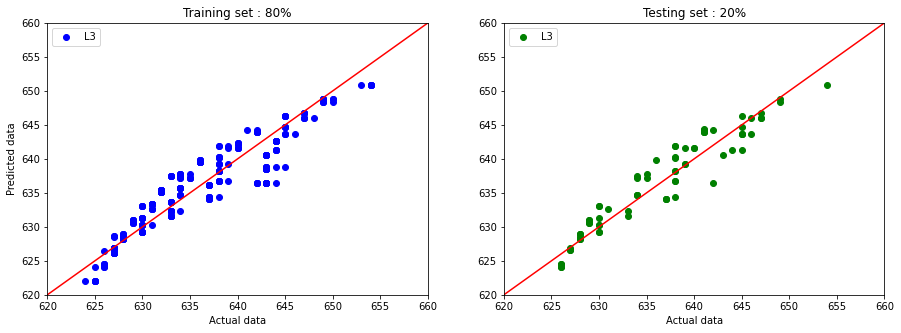

In [766]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
y_pred_train = regr.intercept_[0]+ regr.coef_[0][0]*x_train[:,0] + regr.coef_[0][1]*x_train[:,1] + regr.coef_[0][2]*x_train[:,2]
plt.scatter(  y_train , y_pred_train, color='blue' , label='L3')
plt.xlabel("Actual data")
plt.ylabel("Predicted data")
XX = np.arange(0.0, 1000.0, 0.1)
#yy = regr.intercept_[0]+ regr.coef_[0][0]*XX + regr.coef_[0][1]*XX
yy = XX
plt.plot(XX, yy, '-r' )
plt.ylim(620,660)
plt.xlim(620,660)
plt.title('Training set : 80%')
plt.legend()

plt.subplot(1,2,2)
plt.xlabel("Actual data")

yy = XX
plt.plot(XX, yy, '-r' )
y_pred_test = regr.intercept_[0]+ regr.coef_[0][0]*x_test[:,0] + regr.coef_[0][1]*x_test[:,1] + regr.coef_[0][2]*x_test[:,2]
plt.ylim(620,660)
plt.xlim(620,660)
plt.scatter( y_test ,y_pred_test,  color='green', label='L3')
plt.title('Testing set : 20%')
plt.legend()

In [767]:
print(y_train)

[[643]
 [638]
 [634]
 [638]
 [643]
 [634]
 [634]
 [644]
 [628]
 [638]
 [636]
 [645]
 [635]
 [633]
 [645]
 [647]
 [637]
 [649]
 [627]
 [639]
 [627]
 [645]
 [632]
 [625]
 [650]
 [632]
 [641]
 [636]
 [636]
 [640]
 [636]
 [646]
 [634]
 [629]
 [634]
 [631]
 [630]
 [637]
 [649]
 [643]
 [645]
 [634]
 [644]
 [630]
 [647]
 [634]
 [625]
 [643]
 [634]
 [642]
 [630]
 [630]
 [629]
 [625]
 [643]
 [635]
 [627]
 [634]
 [627]
 [634]
 [630]
 [642]
 [640]
 [645]
 [625]
 [629]
 [631]
 [633]
 [643]
 [638]
 [643]
 [636]
 [632]
 [629]
 [633]
 [634]
 [631]
 [624]
 [654]
 [649]
 [647]
 [631]
 [643]
 [627]
 [636]
 [632]
 [643]
 [650]
 [634]
 [643]
 [625]
 [635]
 [643]
 [630]
 [635]
 [647]
 [654]
 [638]
 [628]
 [633]
 [644]
 [645]
 [633]
 [637]
 [633]
 [628]
 [647]
 [643]
 [629]
 [637]
 [630]
 [638]
 [627]
 [630]
 [638]
 [627]
 [649]
 [629]
 [632]
 [633]
 [633]
 [642]
 [638]
 [640]
 [653]
 [629]
 [631]
 [638]
 [628]
 [643]
 [634]
 [633]
 [627]
 [633]
 [645]
 [649]
 [639]
 [649]
 [627]
 [640]
 [648]
 [642]
 [633]

In [768]:
print(y_pred_train)

[638.50565658 638.16487085 637.81650526 641.91889746 638.49302348
 632.33833704 635.76783578 642.60804878 628.24857794 636.78909483
 639.52691563 646.36460202 637.12988056 633.70147995 644.65419164
 646.70791437 634.05237216 648.43348446 626.86126695 636.78656821
 626.18474873 643.64194094 635.42199681 622.07982991 648.4259046
 635.07363122 644.32098578 639.52438901 639.8727546  641.58821822
 639.53196887 643.63183446 634.74295197 630.6329799  637.82408512
 633.36322084 629.26082864 636.10104164 648.42843122 638.85797728
 646.36965526 637.47066629 642.60552216 633.02243511 646.71549423
 635.7703624  622.08740977 638.49807672 637.82661174 643.97262018
 630.29724742 629.26588188 630.64055977 624.12344615 638.49049686
 637.13240718 626.18222211 637.14504028 626.52806108 635.76025592
 631.31202474 643.98020005 642.25715657 646.37976174 622.08488315
 630.98387212 632.69428249 633.70905981 638.50060334 639.18865652
 640.54421958 639.87022798 635.07868446 630.96871239 631.65028385
 637.468139

In [769]:
print(y_test)

[[638]
 [641]
 [645]
 [635]
 [630]
 [645]
 [647]
 [645]
 [641]
 [638]
 [637]
 [633]
 [630]
 [637]
 [626]
 [628]
 [635]
 [634]
 [641]
 [639]
 [638]
 [641]
 [642]
 [630]
 [630]
 [634]
 [647]
 [638]
 [628]
 [646]
 [645]
 [636]
 [638]
 [626]
 [628]
 [627]
 [640]
 [641]
 [634]
 [647]
 [628]
 [626]
 [628]
 [627]
 [638]
 [644]
 [629]
 [639]
 [638]
 [629]
 [649]
 [645]
 [631]
 [643]
 [649]
 [630]
 [654]
 [638]
 [629]
 [626]
 [646]
 [628]
 [642]
 [630]
 [645]
 [637]
 [638]
 [633]
 [627]
 [629]
 [630]
 [639]
 [640]
 [634]
 [634]]


In [770]:
print(y_pred_test)

[638.15476437 644.32856564 644.66429813 637.12735394 630.28966755
 643.6368877  646.03139615 643.63436108 643.98525329 641.9239507
 634.0574254  631.64775723 630.30230066 634.0447923  624.47181174
 628.92256953 637.81145202 634.73284549 643.98777991 641.59074484
 634.39205976 644.32603902 636.44688062 633.03506822 631.31707798
 637.14251366 646.72054747 638.15981761 628.23089159 643.62930784
 641.237326   639.86770136 641.93153057 624.12849939 628.23847145
 626.52300784 641.57811173 643.98272667 637.47319291 646.02886953
 628.91246305 624.47433836 628.57420394 626.53564094 640.20848709
 641.24743249 630.97881887 639.18360328 640.20596047 630.63045328
 648.43601108 646.37723512 632.68164939 640.56190592 648.76921695
 629.27093512 650.82293967 636.79920131 630.62792666 624.13355263
 646.03897601 628.93014939 644.31340591 633.03759484 643.64699418
 634.04226568 636.79162145 632.35349676 626.86884681 630.97123901
 629.26335526 639.18107666 641.5856916  634.74800521 634.73789873]
